In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
event=pd.read_csv("/Users/Aanchal/Documents/olympic/athlete_events.csv")
event.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [4]:
rgn=pd.read_csv("/Users/Aanchal/Documents/olympic/noc_regions.csv")
rgn.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [5]:
#rgn.NOC.unique

In [6]:
event[['Age','Height','Weight']].describe()

,Age,Height,Weight
count,261642.000000,210945.000000,208241.000000
mean,25.556898,175.338970,70.702393
std,6.393561,10.518462,14.348020
min,10.000000,127.000000,25.000000
25%,21.000000,168.000000,60.000000
50%,24.000000,175.000000,70.000000
75%,28.000000,183.000000,79.000000
max,97.000000,226.000000,214.000000


In [7]:
#print(event[["Games","Year","Season"]])
event.sort_values('Games',inplace=True)
event.Games.unique()

array(['1896 Summer', '1900 Summer', '1904 Summer', '1906 Summer',
       '1908 Summer', '1912 Summer', '1920 Summer', '1924 Summer',
       '1924 Winter', '1928 Summer', '1928 Winter', '1932 Summer',
       '1932 Winter', '1936 Summer', '1936 Winter', '1948 Summer',
       '1948 Winter', '1952 Summer', '1952 Winter', '1956 Summer',
       '1956 Winter', '1960 Summer', '1960 Winter', '1964 Summer',
       '1964 Winter', '1968 Summer', '1968 Winter', '1972 Summer',
       '1972 Winter', '1976 Summer', '1976 Winter', '1980 Summer',
       '1980 Winter', '1984 Summer', '1984 Winter', '1988 Summer',
       '1988 Winter', '1992 Summer', '1992 Winter', '1994 Winter',
       '1996 Summer', '1998 Winter', '2000 Summer', '2002 Winter',
       '2004 Summer', '2006 Winter', '2008 Summer', '2010 Winter',
       '2012 Summer', '2014 Winter', '2016 Summer'], dtype=object)

# Games in Summer

In [39]:
event[event['Season']=='Summer'].Sport.unique()

array(['Shooting', 'Gymnastics', 'Tennis', 'Wrestling', 'Weightlifting',
       'Cycling', 'Athletics', 'Swimming', 'Fencing', 'Archery', 'Rowing',
       'Sailing', 'Water Polo', 'Football', 'Cricket', 'Golf', 'Rugby',
       'Equestrianism', 'Tug-Of-War', 'Polo', 'Croquet', 'Basque Pelota',
       'Diving', 'Lacrosse', 'Boxing', 'Roque', 'Figure Skating',
       'Hockey', 'Racquets', 'Jeu De Paume', 'Motorboating',
       'Art Competitions', 'Modern Pentathlon', 'Ice Hockey', 'Alpinism',
       'Canoeing', 'Basketball', 'Handball', 'Aeronautics', 'Judo',
       'Volleyball', 'Synchronized Swimming', 'Rhythmic Gymnastics',
       'Table Tennis', 'Badminton', 'Baseball', 'Softball',
       'Beach Volleyball', 'Taekwondo', 'Triathlon', 'Trampolining',
       'Rugby Sevens'], dtype=object)

# Games in Winter

In [40]:
event[event['Season']=='Winter'].Sport.unique()

array(['Curling', 'Ice Hockey', 'Speed Skating', 'Alpinism',
       'Figure Skating', 'Military Ski Patrol', 'Cross Country Skiing',
       'Bobsleigh', 'Ski Jumping', 'Nordic Combined', 'Skeleton',
       'Alpine Skiing', 'Biathlon', 'Luge', 'Short Track Speed Skating',
       'Freestyle Skiing', 'Snowboarding'], dtype=object)

# Male - Female Comparison

## Participants age in games

C:\Users\Aanchal\Anaconda2\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


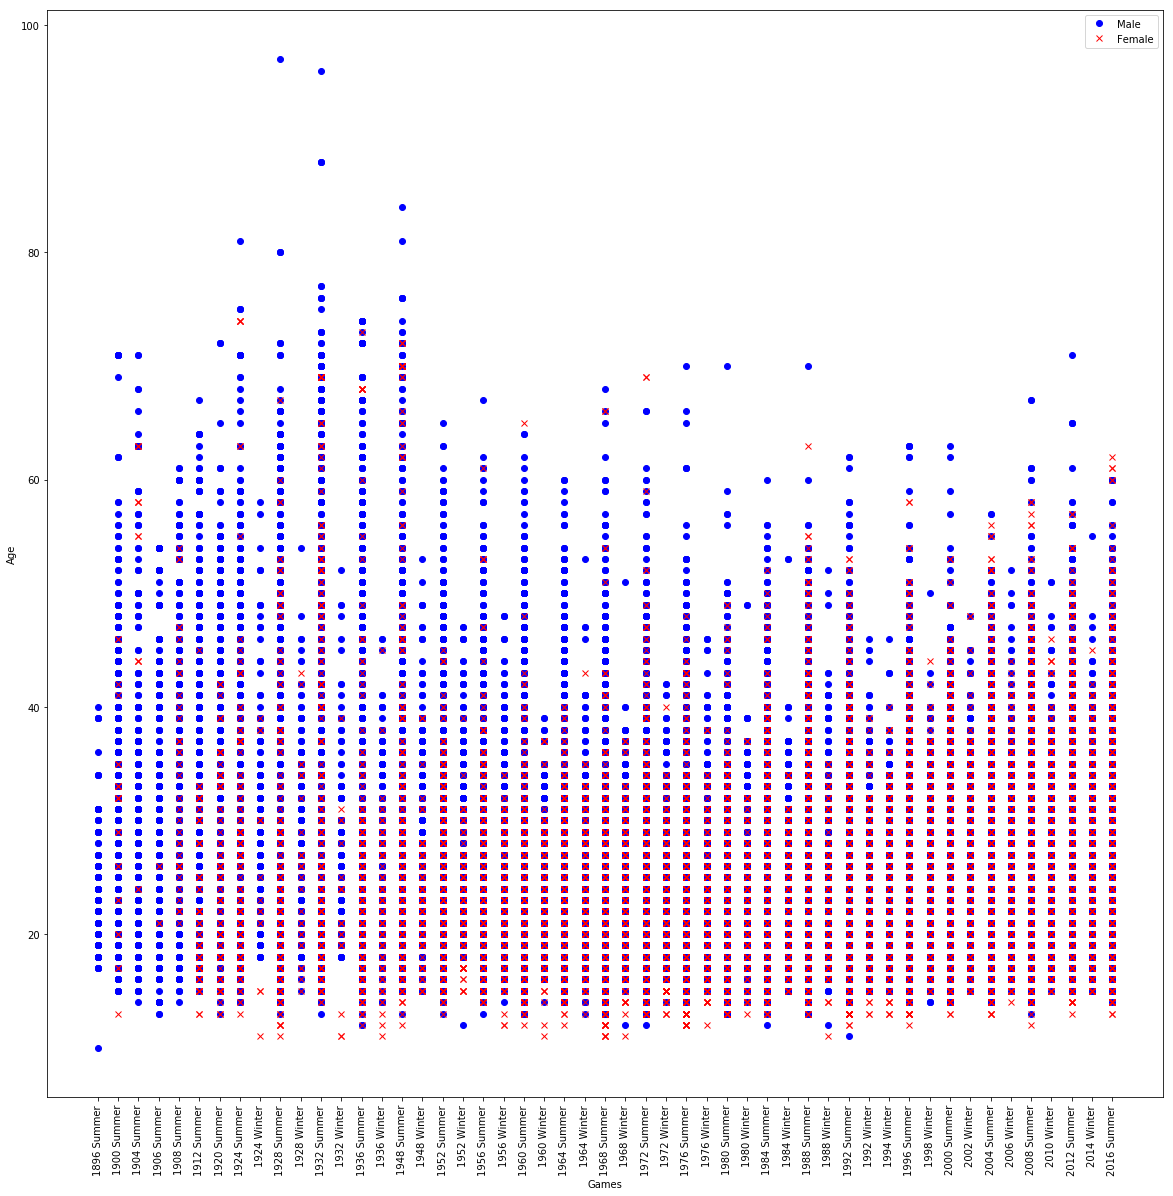

In [8]:
fig=plt.figure(figsize=(20,20))
plt.xticks(rotation=90)
ax=fig.add_subplot(111)
ax.plot(event["M" == event['Sex']]['Games'],event["M" == event['Sex']]['Age'],'bo')
ax.plot(event["F" == event['Sex']]['Games'],event["F" == event['Sex']]['Age'],'rx')
plt.xlabel('Games')
plt.ylabel('Age')
plt.legend({'Male','Female'})
plt.show()

## Male - Female participation count in Games

C:\Users\Aanchal\Anaconda2\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Aanchal\Anaconda2\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


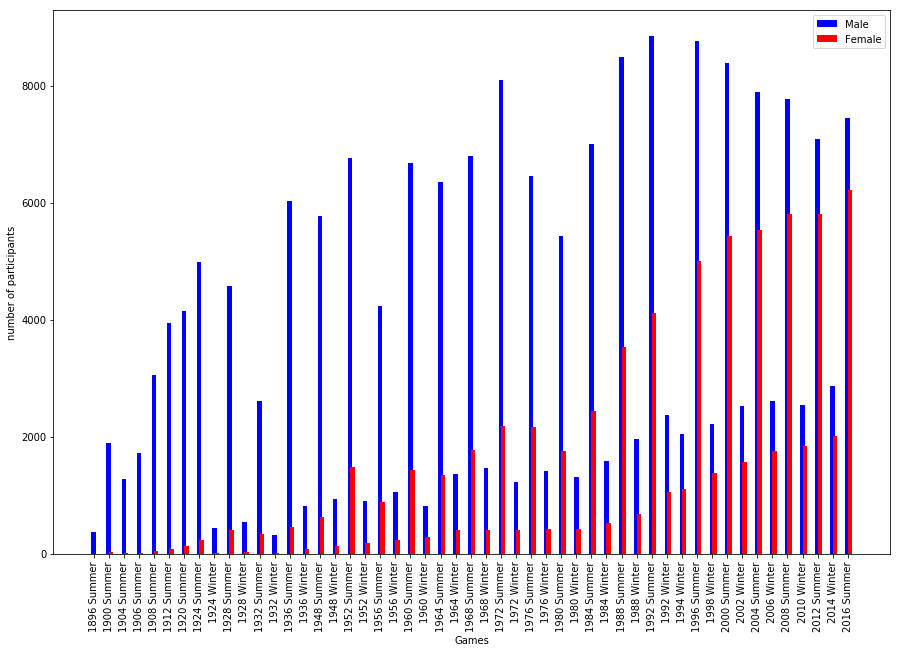

In [9]:
year_count_M={}
for y in event.Games.unique():
    year_count_M[y]=event[event.Sex=='M'][event.Games==y]['Season'].count()
year_count_F={}
for y in event.Games.unique():
    year_count_F[y]=event[event.Sex=='F'][event.Games==y]['Season'].count()
year_count_F=sorted(year_count_F.items())
year_count_M=sorted(year_count_M.items())

fig=plt.figure(figsize=(15,10))
plt.xticks(rotation=90)
ax=fig.add_subplot(111)

x,y=zip(*year_count_M)
ax.bar(x,y,color='blue',width=0.3,align='center')

x,y=zip(*year_count_F)
ax.bar(x,y,color='red',width=0.3,align='edge')

plt.ylabel('number of participants')
plt.xlabel('Games')
plt.legend({'Male','Female'})
#plt.show()

## Medals won by male participants in Games

C:\Users\Aanchal\Anaconda2\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Aanchal\Anaconda2\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\Aanchal\Anaconda2\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


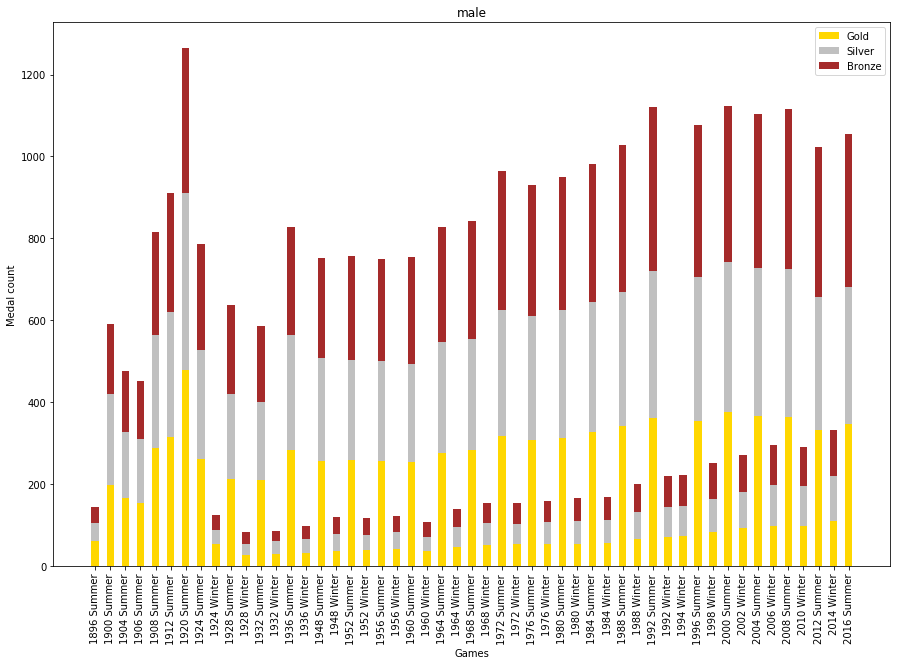

In [10]:
year_count_M_G={}
for y in event.Games.unique():
    year_count_M_G[y]=event[event.Sex=='M'][event.Games==y][event.Medal=='Gold']['Season'].count()
year_count_M_S={}
for y in event.Games.unique():
    year_count_M_S[y]=event[event.Sex=='M'][event.Games==y][event.Medal=='Silver']['Season'].count()
year_count_M_B={}
for y in event.Games.unique():
    year_count_M_B[y]=event[event.Sex=='M'][event.Games==y][event.Medal=='Bronze']['Season'].count()
    
year_count_M_G=sorted(year_count_M_G.items())
year_count_M_S=sorted(year_count_M_S.items())
year_count_M_B=sorted(year_count_M_B.items())

fig=plt.figure(figsize=(15,10))
plt.xticks(rotation=90)
ax=fig.add_subplot(111)

xg,yg = zip(*year_count_M_G)
ax.bar(xg,yg,color='gold',width=0.5)
#print(year_count_M_G)

xs,ys = zip(*year_count_M_S)
ax.bar(xs,ys,bottom=yg,color='silver',width=0.5)
#print(year_count_M_S)

xb,yb = zip(*year_count_M_B)
ax.bar(xb,yb,bottom=np.array(ys)+np.array(yg),color='brown',width=0.5)
#print(year_count_M_B)

plt.ylabel('Medal count')
plt.xlabel('Games')
plt.legend({'Bronze','Silver','Gold'})
plt.title('male')
plt.show()

## Medals won by female participants in Games

C:\Users\Aanchal\Anaconda2\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Aanchal\Anaconda2\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\Aanchal\Anaconda2\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


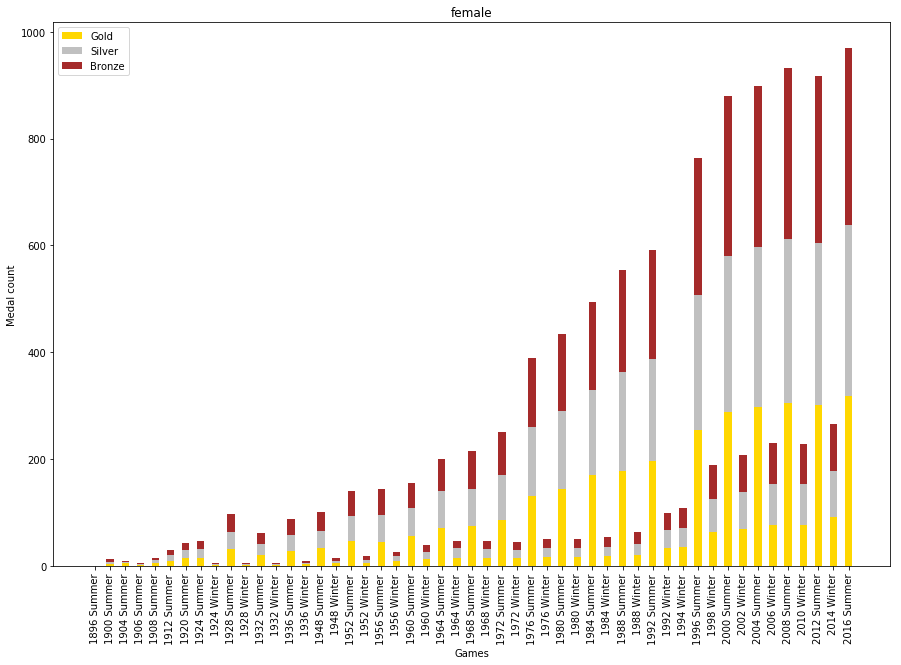

In [11]:
year_count_F_G={}
for y in event.Games.unique():
    year_count_F_G[y]=event[event.Sex=='F'][event.Games==y][event.Medal=='Gold']['Season'].count()
year_count_F_S={}
for y in event.Games.unique():
    year_count_F_S[y]=event[event.Sex=='F'][event.Games==y][event.Medal=='Silver']['Season'].count()
year_count_F_B={}
for y in event.Games.unique():
    year_count_F_B[y]=event[event.Sex=='F'][event.Games==y][event.Medal=='Bronze']['Season'].count()

year_count_F_G=sorted(year_count_F_G.items())
year_count_F_S=sorted(year_count_F_S.items())
year_count_F_B=sorted(year_count_F_B.items())

fig=plt.figure(figsize=(15,10))
plt.xticks(rotation=90)
ax=fig.add_subplot(111)

xg,yg = zip(*year_count_F_G)
ax.bar(xg,yg,color='gold',width=0.5)

xs,ys = zip(*year_count_F_S)
ax.bar(xs,ys,bottom=yg,color='silver',width=0.5)

xb,yb = zip(*year_count_F_B)
ax.bar(xb,yb,bottom=np.array(ys)+np.array(yg),color='brown',width=0.5)

plt.ylabel('Medal count')
plt.xlabel('Games')
plt.legend({'Bronze','Silver','Gold'})
plt.title('female')
plt.show()

In [12]:
#event.Medal.unique()

# Team-wise Analyzation

In [13]:
len(event.Team.unique())

1184

## Total medals won by females of particular country

C:\Users\Aanchal\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


Text(0.5,1,'female')

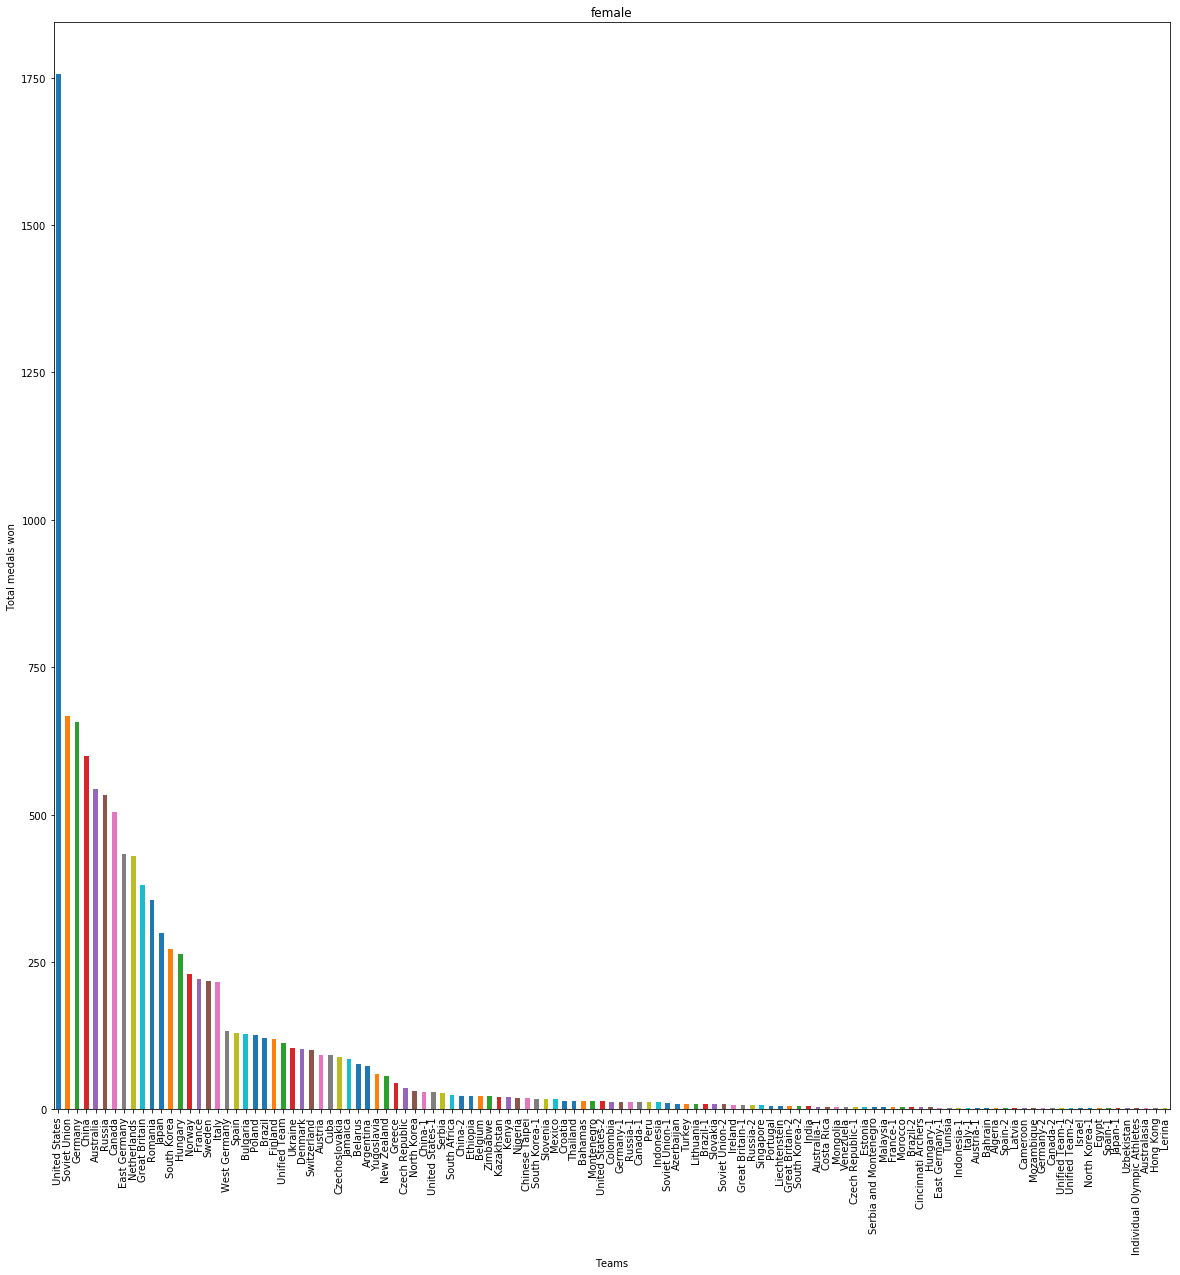

In [14]:
plt.figure(figsize=(20,20))
tmp=event[(event.Medal=='Gold')|( event.Medal=='Silver')|(event.Medal=='Bronze')][event.Sex=='F'].Team.value_counts()
tmp[(tmp.values>1)].plot('bar')
plt.xlabel('Teams')
plt.ylabel('Total medals won')
plt.title('female')

## Total medals won by males of particular country

C:\Users\Aanchal\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


Text(0.5,1,'male')

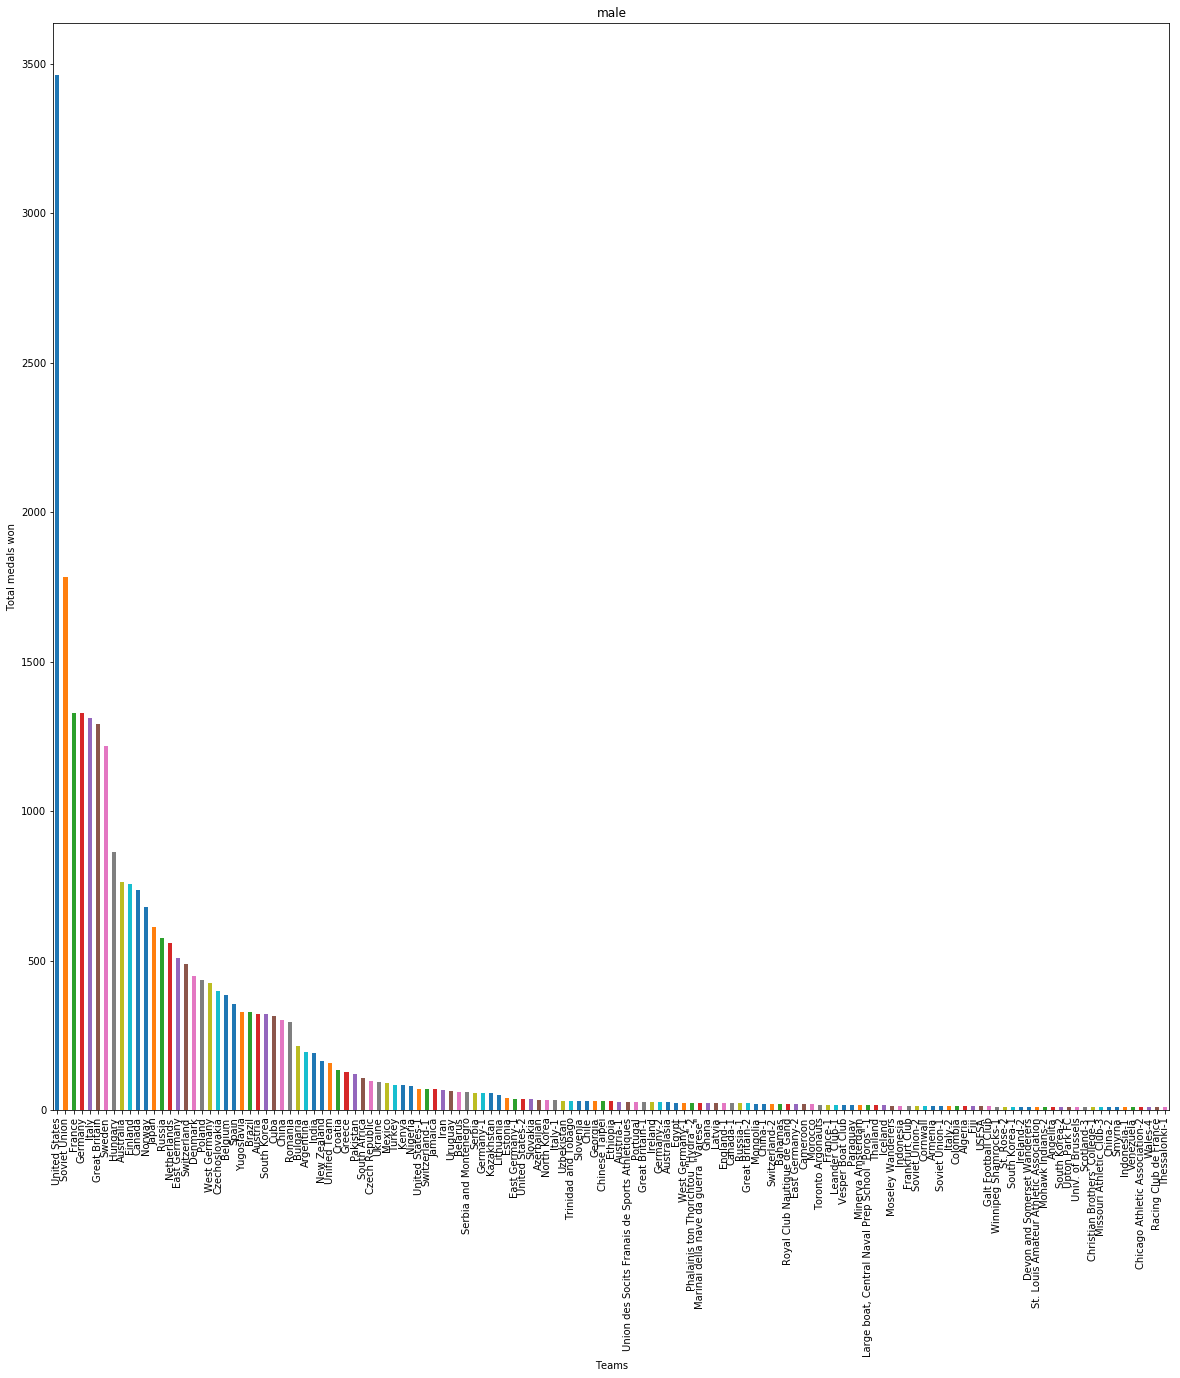

In [15]:
plt.figure(figsize=(20,20))
tmp=event[(event.Medal=='Gold')|( event.Medal=='Silver')|(event.Medal=='Bronze')][event.Sex=='M'].Team.value_counts()
tmp[(tmp.values>10)].plot('bar')
plt.xlabel('Teams')
plt.ylabel('Total medals won')
plt.title('male')

# Participants and their medals

In [98]:
sport=event[(event.Medal=='Gold')|( event.Medal=='Silver')|(event.Medal=='Bronze')].set_index('Name').Sport.reset_index()
sport=sport.drop_duplicates(keep='first')
#sport.sort_values('Name')

In [99]:
Participants=pd.DataFrame(columns=['Gold','Silver','Bronze','Total'])
#Participants.append(event[event.Medal=='Gold'].Name.value_counts())
Participants['Gold']=event[event.Medal=='Gold'].Name.value_counts()
Participants['Silver']=event[event.Medal=='Silver'].Name.value_counts()
Participants['Bronze']=event[event.Medal=='Bronze'].Name.value_counts()
Participants['Total']=event[(event.Medal=='Gold')|( event.Medal=='Silver')|(event.Medal=='Bronze')].Name.value_counts()

Participants=pd.merge(Participants,sport,left_index=True,right_on='Name')
Participants.sort_values('Total',ascending=False,inplace=True)
Participants.set_index('Name')

,Gold,Silver,Bronze,Total,Sport
Name,,,,,
"Michael Fred Phelps, II",23,3.0,2.0,28,Swimming
Larysa Semenivna Latynina (Diriy-),9,5.0,4.0,18,Gymnastics
Nikolay Yefimovich Andrianov,7,5.0,3.0,15,Gymnastics
Ole Einar Bjrndalen,8,4.0,1.0,13,Biathlon
Takashi Ono,5,4.0,4.0,13,Gymnastics
Edoardo Mangiarotti,6,5.0,2.0,13,Fencing
Borys Anfiyanovych Shakhlin,7,4.0,2.0,13,Gymnastics
Paavo Johannes Nurmi,9,3.0,NaN,12,Athletics
Sawao Kato,8,3.0,1.0,12,Gymnastics


In [148]:
x=event[((event.Medal=='Gold')|( event.Medal=='Silver')|(event.Medal=='Bronze'))]
x=x.groupby(['Team','Sport','Medal'])['Medal'].count()
#x.to_frame()#.sort_values('Medal',ascending=False)
x.to_frame()

Medal
Team                         Sport         Medal        
A North American Team        Polo          Bronze      4
Afghanistan                  Taekwondo     Bronze      2
Algeria                      Athletics     Bronze      2
                                           Gold        4
                                           Silver      3
                             Boxing        Bronze      5
                                           Gold        1
                             Judo          Bronze      1
                                           Silver      1
Ali-Baba II                  Sailing       Bronze      5
Amateur Athletic Association Athletics     Gold        5
Amstel Amsterdam             Rowing        Bronze      4
Ancora                       Sailing       Gold        4
Angelita                     Sailing       Gold       12
Antwerpia V                  Sailing       Bronze      5
Aphrodite                    Sailing       Bronze      3
Argentina                    Athletics     Gold        2
                                           Silver      3
                             Basketball    Bronze     12
                                           Gold       12
                             Boxing        Bronze     10
                                           Gold        7
                                           Silver      7
                             Cycling       Gold        2
                             Equestrianism Silver      1
                             Fencing       Bronze      5
                             Football      Gold       34
                                           Silver     34
                             Hockey        Bronze     32
                                           Gold       18
...                                                  ...
Yugoslavia                   Gymnastics    Bronze     11
                                           Gold        5
                                           Silver      2
                             Handball      Bronze     15
                                           Gold       43
                                           Silver     14
                             Judo          Bronze      2
                             Rowing        Bronze      7
                                           Gold        4
                                           Silver      2
                             Shooting      Bronze      1
                                           Gold        2
                             Ski Jumping   Bronze      1
                                           Silver      4
                             Swimming      Gold        1
                                           Silver      1
                             Table Tennis  Bronze      2
                                           Silver      2
                             Water Polo    Gold       37
                                           Silver     39
                             Wrestling     Bronze      6
                                           Gold        4
                                           Silver      6
Zambia                       Athletics     Silver      1
                             Boxing        Bronze      1
Zimbabwe                     Hockey        Gold       15
                             Swimming      Bronze      1
                                           Gold        2
                                           Silver      4
Zut                          Sailing       Silver      3

[3574 rows x 1 columns]